In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [4]:
def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'

In [5]:
data['Index'] = data['Index'].apply(give_names_to_indices)

In [6]:
data

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight
...,...,...,...,...
495,Female,150,153,Extremely Obese
496,Female,184,121,Obesity
497,Female,141,136,Extremely Obese
498,Male,150,95,Extremely Obese


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


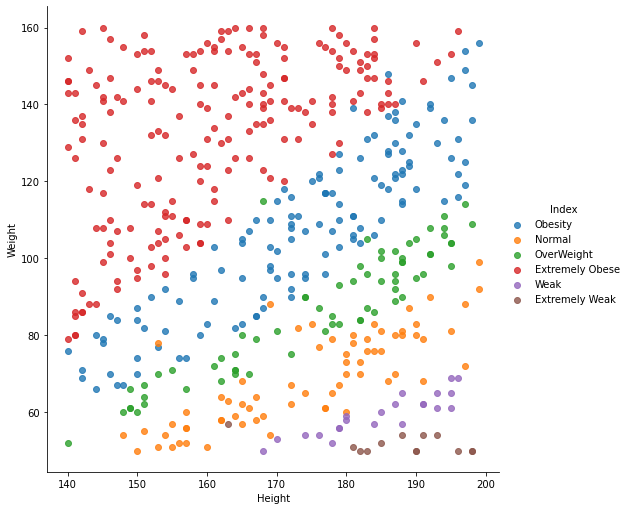

In [7]:
sns.lmplot('Height','Weight',data,hue='Index',size=7,aspect=1,fit_reg=False)

In [8]:
people = data['Gender'].value_counts()
people

Female    255
Male      245
Name: Gender, dtype: int64

In [9]:
categories = data['Index'].value_counts()
categories

Extremely Obese    198
Obesity            130
Normal              69
OverWeight          68
Weak                22
Extremely Weak      13
Name: Index, dtype: int64

In [10]:
# STATS FOR MEN
data[data['Gender']=='Male']['Index'].value_counts()

Extremely Obese    105
Obesity             59
OverWeight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Index, dtype: int64

In [11]:
# STATS FOR WOMEN
data[data['Gender']=='Female']['Index'].value_counts()

Extremely Obese    93
Obesity            71
Normal             41
OverWeight         36
Weak                7
Extremely Weak      7
Name: Index, dtype: int64

In [13]:
data2 = pd.get_dummies(data['Gender'])
data.drop('Gender',axis=1,inplace=True)
data = pd.concat([data,data2],axis=1)
data.head()

,Height,Weight,Index,Female,Male
0,174,96,Obesity,0,1
1,189,87,Normal,0,1
2,185,110,Obesity,1,0
3,195,104,OverWeight,1,0
4,149,61,OverWeight,0,1


In [14]:
y=data['Index']
data =data.drop(['Index'],axis=1)

In [15]:
data.head()

,Height,Weight,Female,Male
0,174,96,0,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)
data

,0,1,2,3
0,0.247939,-0.309117,-1.020204,1.020204
1,1.164872,-0.587322,-1.020204,1.020204
2,0.920357,0.123647,0.980196,-0.980196
3,1.531645,-0.061823,0.980196,-0.980196
4,-1.280283,-1.391027,-1.020204,1.020204
...,...,...,...,...
495,-1.219155,1.452850,0.980196,-0.980196
496,0.859228,0.463676,0.980196,-0.980196
497,-1.769315,0.927351,0.980196,-0.980196
498,-1.219155,-0.340029,-1.020204,1.020204


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)

In [20]:
grid_cv.fit(X_train,y_train)

C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.866, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.819, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.870, total=   0.1s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.882, total=   0.2s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.836, total=   0.2s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.861, total=   0.2s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.874, total=   0.4s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.828, total=   0.3s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.852, total=   0.4s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.882, total=   0.4s
[CV] n_estimators=400 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   13.9s finished
C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=101,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_g

In [21]:
grid_cv.best_params_

{'n_estimators': 200}

In [22]:
pred = grid_cv.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Acuuracy is --> ',accuracy_score(y_test,pred)*100)
print('\n')

                 precision    recall  f1-score   support

Extremely Obese       0.91      0.97      0.94        63
 Extremely Weak       1.00      1.00      1.00         1
         Normal       0.92      0.96      0.94        23
        Obesity       0.78      0.82      0.79        38
     OverWeight       0.92      0.58      0.71        19
           Weak       0.83      0.83      0.83         6

       accuracy                           0.87       150
      macro avg       0.89      0.86      0.87       150
   weighted avg       0.88      0.87      0.87       150



[[61  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 22  0  0  1]
 [ 6  0  0 31  1  0]
 [ 0  0  1  7 11  0]
 [ 0  0  1  0  0  5]]


Acuuracy is -->  87.33333333333333




In [24]:
def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float(height),np.float(weight),1.0,0.0]])
    
    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0])
    

In [25]:
#Live predictor

your_details = ['Male',175,80]
print(lp(your_details))

OverWeight
